In [84]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
from scipy.stats import kurtosis, skew
import seaborn as sns

In [58]:
df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv', encoding='latin1')
df

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,11/21/2022,10:15,"Medellín, Colombia",AeroPaca SAS,NaN,Medellín - Pizarro,Piper PA-31-350 Navajo Chieftain,HK-5121,31-7652004,8.0,6.0,2.0,8.0,6.0,2.0,0.0,The plane was chartered to carry a team of six...
4994,1/15/2023,10:50,"Pokhara, Nepal",Yeti Airlines,YT691,Kathmandu - Pokhara,ATR 72-500-72-212-A,9NANC,754,72.0,68.0,4.0,72.0,68.0,4.0,0.0,"Before approach, the pilot requested a change ..."
4995,9/16/2023,NaN,"Barcelos, Brazil",Manaus Aerotaxi,NaN,NaN,Embraer EMB-110P1 Bandeirante,PT-SOG,110490,14.0,12.0,2.0,14.0,12.0,2.0,0.0,The air taxi crashed in heavy rain while attem...
4996,10/29/2023,6:30,"Rio Branco, Brazil",ART Taxi Aero,NaN,Rio Branco - Envira,Cessna 208B Grand Caravan,PT-MEE,208B0344,12.0,10.0,2.0,12.0,10.0,2.0,0.0,The air taxi crashed into a heavy wooded area ...


In [ ]:
df = df.fillna({'Flight #': 'Unknown', 'Route': 'Unknown', 'AC Type': 'Unknown', 'Registration': 'Unknown'})

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], errors='coerce').dt.time

df['Operator'] = df['Operator'].astype('category')

In [42]:
num_crashes = df.shape[0]

total_fatalities = df['Fatalities'].sum()

total_survivors = df['Aboard'].sum() - total_fatalities

survival_rate = total_survivors / df['Aboard'].sum()

print("Number of crashes:", num_crashes)
print("Total fatalities:", total_fatalities)
print("Total survivors:", total_survivors)
print("Survival rate: {:.2%}".format(survival_rate))

Number of crashes: 4998
Total fatalities: 111644.0
Total survivors: 43712.0
Survival rate: 28.14%


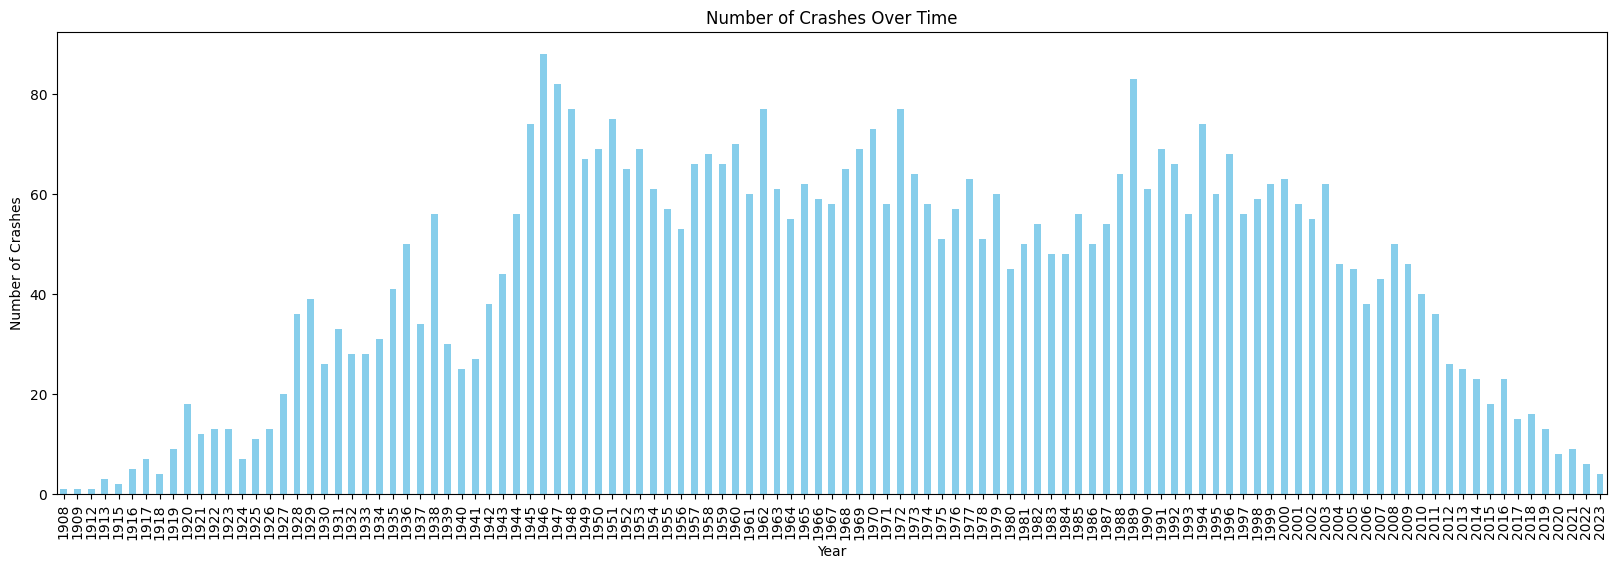

In [59]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year

crashes_by_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(20, 6))
crashes_by_year.plot(kind='bar', color='skyblue')
plt.title('Number of Crashes Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.show()

In [60]:
df['Survival Rate'] = 1 - (df['Fatalities'] / df['Aboard'].replace(0, np.nan))

df = df.dropna(subset=['Aboard'])

fatality_stats = stats.describe(df['Fatalities'])
survival_rate_stats = stats.describe(df['Survival Rate'])

print("Statistics for Fatalities:")
print(f"Mean: {fatality_stats.mean:.2f}")
print(f"Median: {np.median(df['Fatalities']):.2f}")
print(f"Standard Deviation: {np.std(df['Fatalities']):.2f}")

print("\nStatistics for Survival Rates:")
print(f"Mean: {survival_rate_stats.mean:.2%}")
print(f"Median: {np.median(df['Survival Rate']):.2%}")
print(f"Standard Deviation: {np.std(df['Survival Rate']):.2%}")

Statistics for Fatalities:
Mean: 22.40
Median: 11.00
Standard Deviation: 35.09

Statistics for Survival Rates:
Mean: nan%
Median: nan%
Standard Deviation: 31.17%


In [68]:
from scipy.stats import ttest_ind

fatalities_1910s = df[(df['Year'] >= 1910) & (df['Year'] < 1920)]['Fatalities']
fatalities_2010s = df[(df['Year'] >= 2010) & (df['Year'] < 2020)]['Fatalities']

t_statistic, p_value = ttest_ind(fatalities_1910s, fatalities_2010s, equal_var=False)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - there is a significant difference.")
else:
    print("Fail to reject the null hypothesis - no significant difference.")

Fail to reject the null hypothesis - no significant difference.


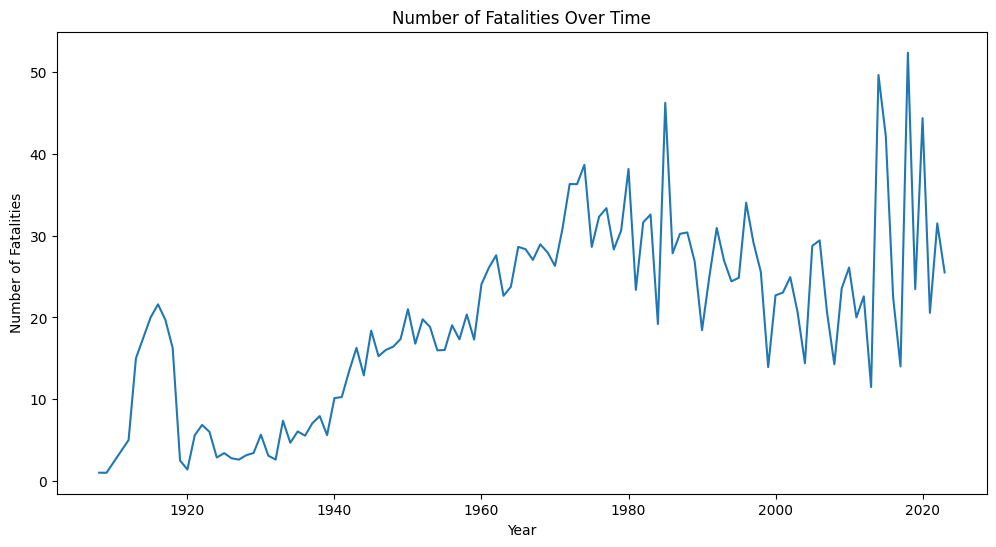

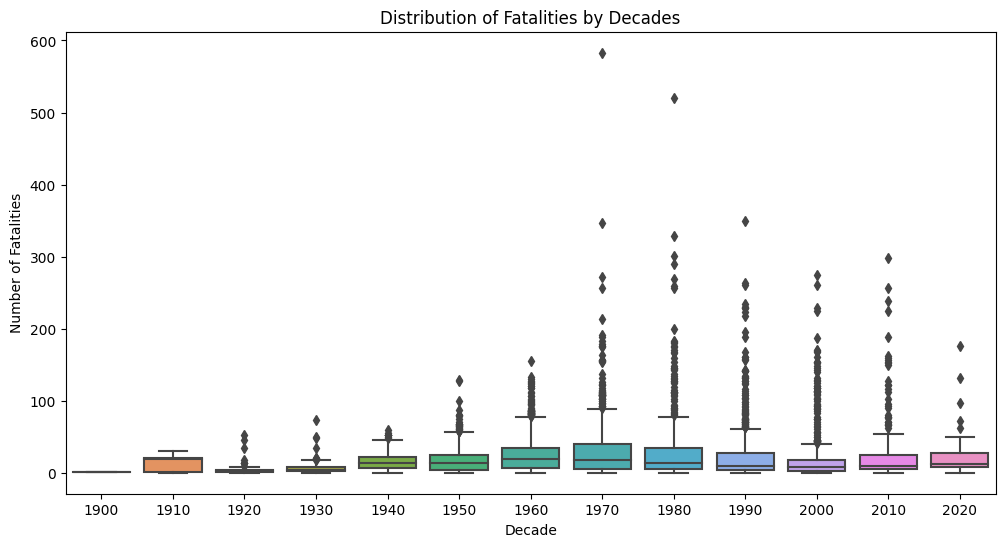

In [93]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Fatalities', data=df, err_style=None)
plt.title('Number of Fatalities Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.show()

fatalities_1910s = df[(df['Year'] >= 1910) & (df['Year'] < 1920)]['Fatalities']
fatalities_2010s = df[(df['Year'] >= 2010) & (df['Year'] < 2020)]['Fatalities']

plt.figure(figsize=(12, 6))
sns.boxplot(x='Decade', y='Fatalities', data=df)
plt.title('Distribution of Fatalities by Decades')
plt.xlabel('Decade')
plt.ylabel('Number of Fatalities')
plt.show()

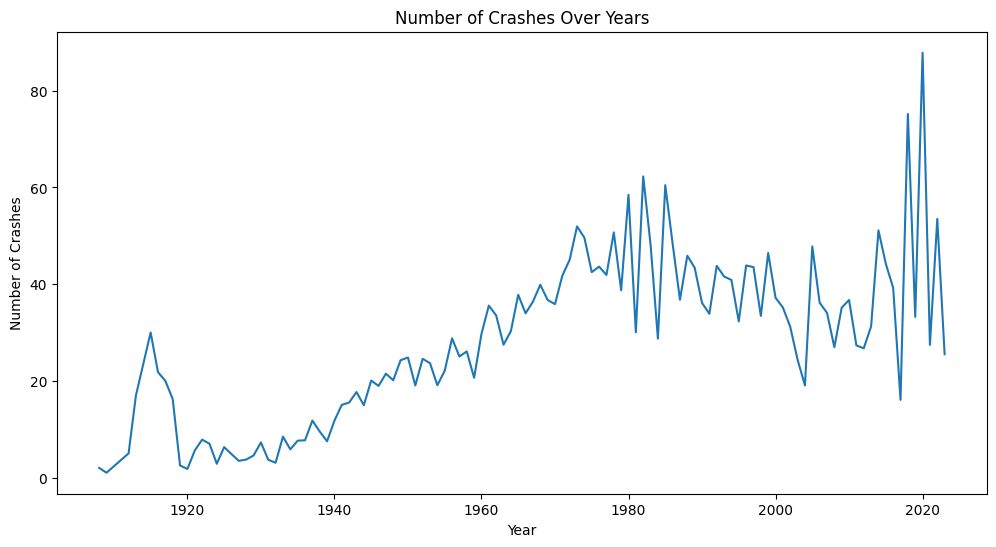

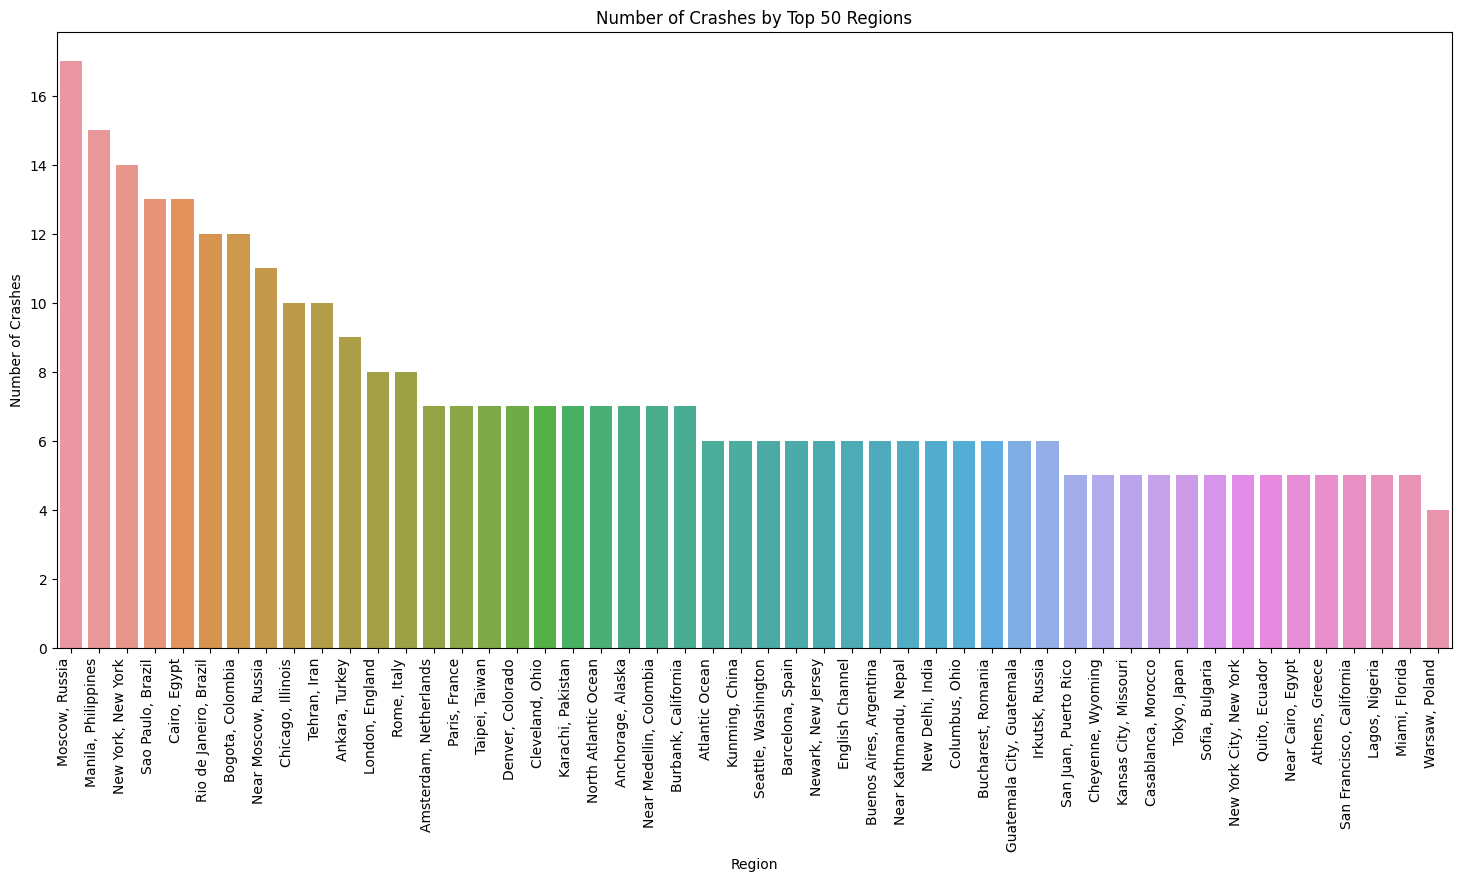

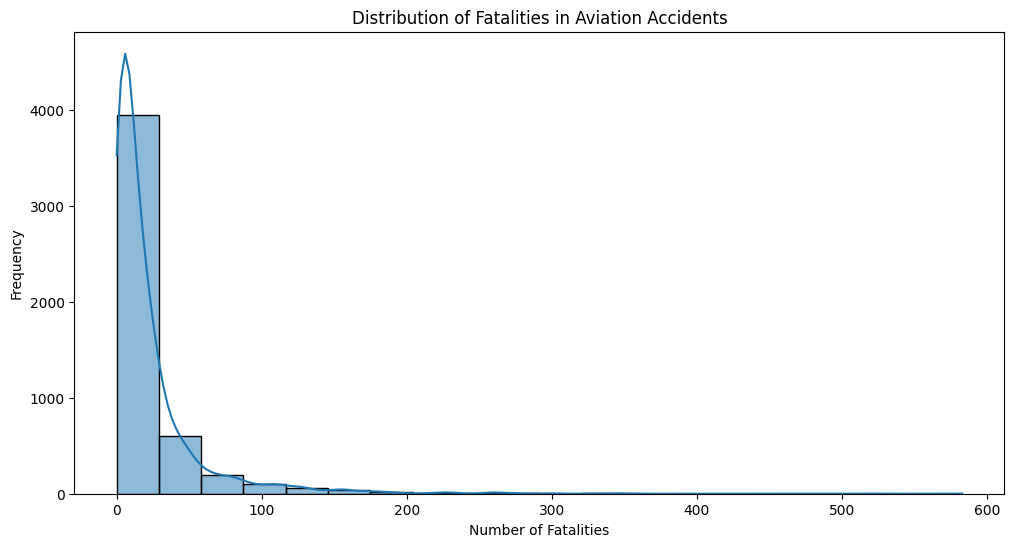

In [102]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Aboard', data=df, errorbar=None)
plt.title('Number of Crashes Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.show()

top_regions = df['Location'].value_counts().nlargest(50).index
filtered_data = df[df['Location'].isin(top_regions)]

plt.figure(figsize=(18, 8))
sns.countplot(x='Location', data=filtered_data, order=top_regions)
plt.title('Number of Crashes by Top 50 Regions')
plt.xlabel('Region')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=90, ha='right')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['Fatalities'], bins=20, kde=True)
plt.title('Distribution of Fatalities in Aviation Accidents')
plt.xlabel('Number of Fatalities')
plt.ylabel('Frequency')
plt.show()